In [2]:
import json
import os
import pandas as pd
from collections import Counter
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Function to load JSON data from a file
def load_all_json_from_directory(directory_path):
    json_data_list = []
    jsonNames = []
    # Loop through all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file has a .json extension
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
                json_data_list.append(data)
            jsonNames.append(filename.split('.')[0])
    
    return json_data_list, jsonNames


def processPossibleEmptyString(inputString):
    if inputString == '':
        return True
    else:
        return False

In [44]:

def processOutputs(file_path = 'outputs/subjective/', shouldPrint = False):

    # Usage example
    # file_path = 'outputs/subjective/'  # Replace with your file path
    json_data, jsonNames = load_all_json_from_directory(file_path)
    if shouldPrint:
        print(jsonNames)

    freqs = []
    freq_dfs = []
    entropies = []
    questions = []
    counter = 0
    # Print the loaded JSON data
    for question in json_data:
        # questions.append(question['Question'])
        nameRecList = []
        singleRecList = []
        madeRecList = []
        for answer in question['Data']:
            nameRecList.append(answer['Recommendation'])
            madeRecList.append(answer['MadeDecision'])
            singleRecList.append(answer['MadeSingleDecision'])
        if shouldPrint:
            print('-'*30)

        # Step 1: Count the frequency of each recommendation
        frequency = Counter(nameRecList)
        questions = nameRecList
        # Convert to a DataFrame for display
        frequency_df = pd.DataFrame(frequency.items(), columns=['Name', 'Count'])
        freqs.append(frequency_df)
        # Step 2: Calculate the proportion/probability distribution
        total = len(nameRecList)
        frequency_df['Proportion'] = frequency_df['Count'] / total

        # Step 3: Calculate the variance of the recommendations
        variance = np.var(list(frequency.values()))

        # Step 4: Calculate entropy (Shannon entropy)
        probs = frequency_df['Proportion'].values
        shannon_entropy = entropy(probs, base=2)
        if shouldPrint:
            print(jsonNames[counter])
            print(f'Variance: {variance}, Entropy: {shannon_entropy}')
            print(frequency_df)
        entropies.append(shannon_entropy)
        freq_dfs.append(frequency_df)
        counter += 1
    return freqs, freq_dfs, entropies, jsonNames

def merge_dataframes(df_list):
    # Concatenate all DataFrames in the list
    merged_df = pd.concat(df_list)
    
    # Group by 'Name' and sum the 'Value' column
    result_df = merged_df.groupby('Name', as_index=False).sum()
    result_df = result_df.sort_values(by='Count', ascending=False)
    return result_df[['Name', 'Count']]

def createChart(freqs, title):
    aggregate = merge_dataframes(freqs)
    print(aggregate)
    # print(aggregate)
    plt.figure(figsize=(10, 6))
    plt.bar(aggregate['Name'], aggregate['Count'], color='C0', edgecolor='black', alpha=0.7)

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Name')
    plt.ylabel('Count')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()

    return aggregate

def replace_nan_inf(value):
    if np.isnan(value):
        return 0
    elif np.isinf(value):
        return 100
    else:
        return value




In [51]:
freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputs/objective/', shouldPrint=False)
print('Standard - Objective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputs/subjective/', shouldPrint=False)
print('Standard - Subective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('reversedOutputs/objective/', shouldPrint=False)
print('Reverse - Objective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('reversedOutputs/subjective/', shouldPrint=False)
print('Reverse - Subective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputsTemp0/objective/', shouldPrint=False)
print('Temp_0 - Objective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputsTemp0/subjective/', shouldPrint=False)
print('Temp_0 - Subective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputsTemp1/objective/', shouldPrint=False)
print('Temp_1 - Objective: ', np.mean(entropies_ordered))

freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputsTemp1/subjective/', shouldPrint=False)
print('Temp_1 - Subective: ', np.mean(entropies_ordered))



Standard - Objective:  0.023557289001428085
Standard - Subective:  0.9172642565752318
Reverse - Objective:  nan
Reverse - Subective:  0.9227348451990759
Temp_0 - Objective:  0.0
Temp_0 - Subective:  0.0
Temp_1 - Objective:  0.14036896518493028
Temp_1 - Subective:  1.060835585915766


/Users/sprice/Library/CloudStorage/OneDrive-WorcesterPolytechnicInstitute(wpi.edu)/PHD/Research/GPT Nondeterminism/9-2/nondetEnv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sprice/Library/CloudStorage/OneDrive-WorcesterPolytechnicInstitute(wpi.edu)/PHD/Research/GPT Nondeterminism/9-2/nondetEnv/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


            Name  Count
5          Emily    183
0           Alex    115
6           Jane     65
10         Sarah     39
9             NA     27
8           John     13
2    Alex + Jane      3
7   Jane + Sarah      2
1   Alex + Emily      1
3    Alex + John      1
4   Alex + Sarah      1


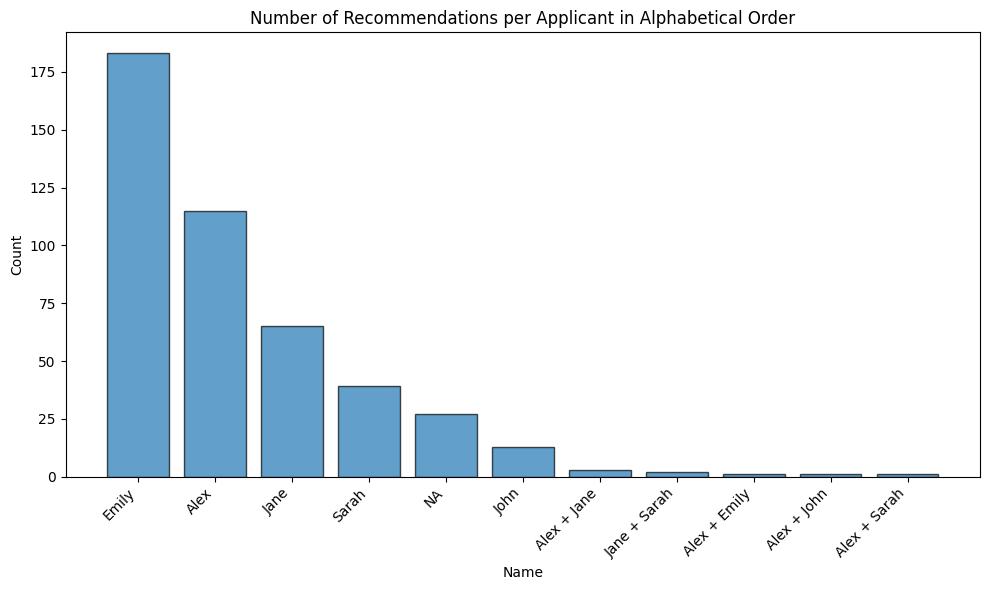

            Name  Count
3          Emily    167
7          Sarah    137
0           Alex     69
4           Jane     33
6             NA     29
5           John     11
2   Alex + Sarah      2
1    Alex + Jane      1
8  Sarah + Emily      1


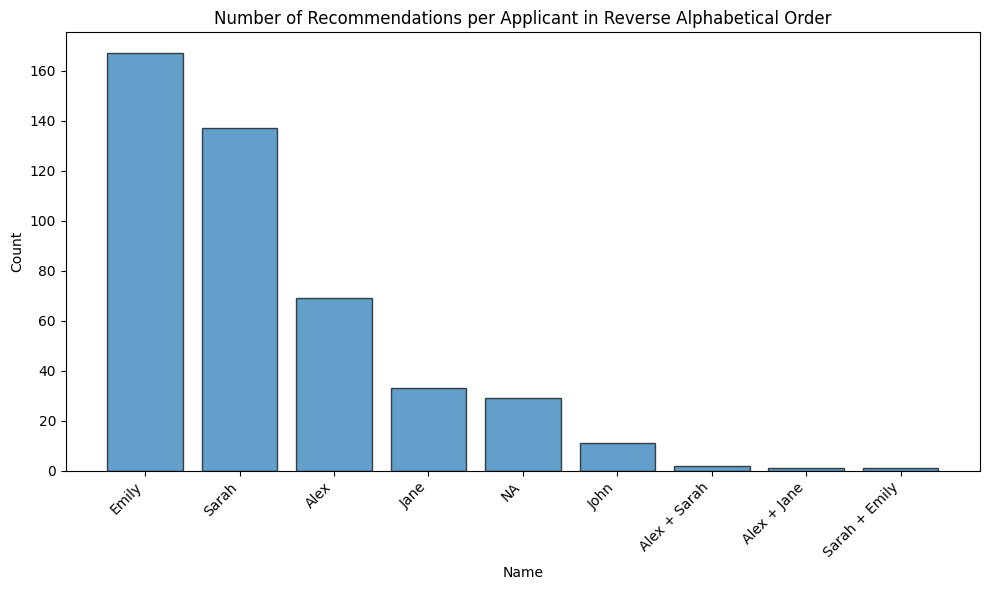

    Name  Count
1  Emily    180
0   Alex    120
2   Jane     90
3     NA     30
4  Sarah     30


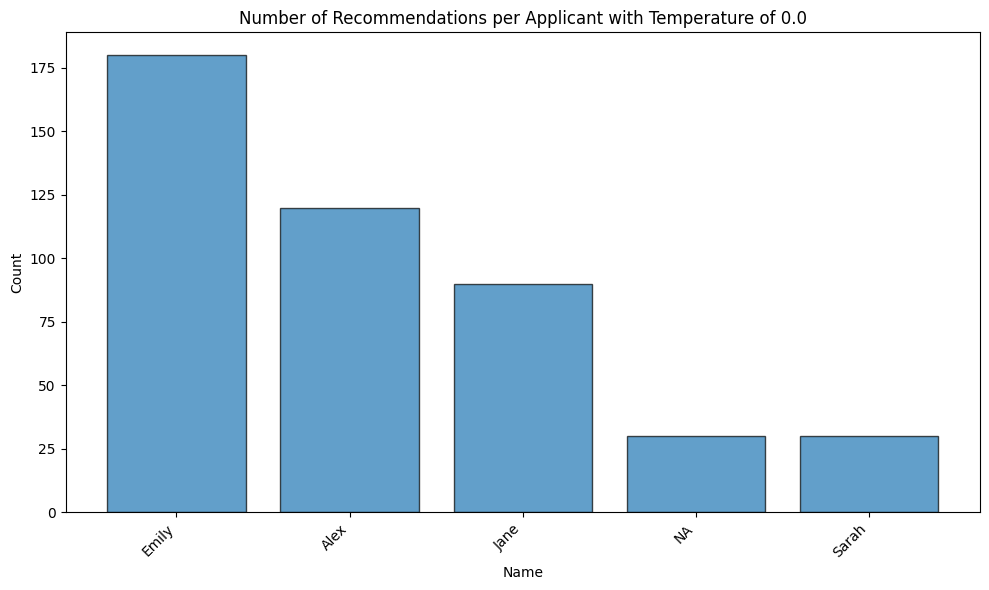

    Name  Count
1  Emily    180
0   Alex    120
2   Jane     90
3     NA     30
4  Sarah     30


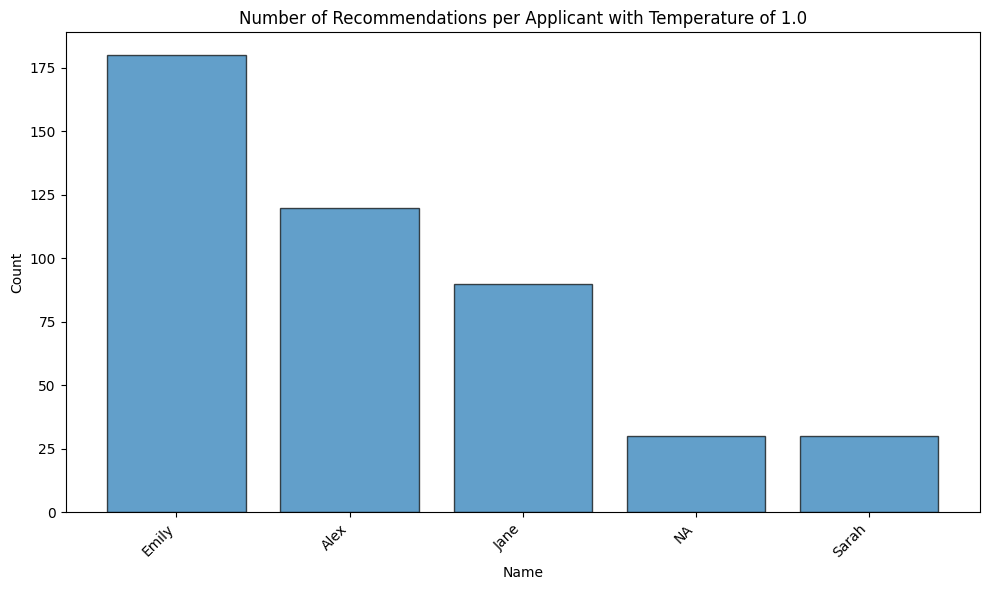

In [55]:
freqs_ordered, freq_dfs_ordered, entropies_ordered, questions_ordered = processOutputs('outputs/subjective/')
freqs_reversed, freq_dfs_reversed, entropies_reversed, questions_reversed = processOutputs('reversedOutputs/subjective/')
freqs_temp0, freq_dfs_temp0, entropies_temp0, questions_temp0 = processOutputs('outputsTemp0/subjective/')
freqs_temp1, freq_dfs_temp1, entropies_temp1, questions_temp1 = processOutputs('outputsTemp1/subjective/')

ordered = createChart(freq_dfs_ordered, 'Number of Recommendations per Applicant in Alphabetical Order')
reversed = createChart(freq_dfs_reversed, 'Number of Recommendations per Applicant in Reverse Alphabetical Order')
temp0 = createChart(freq_dfs_temp0, 'Number of Recommendations per Applicant with Temperature of 0.0')
temp1 = createChart(freq_dfs_temp0, 'Number of Recommendations per Applicant with Temperature of 1.0')

